## Import Libraries


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os
os.makedirs("plots", exist_ok=True)
os.makedirs("plots/binary", exist_ok=True)
os.makedirs("plots/multimodel", exist_ok=True)



## Load Dataset

In [2]:
idsai_path = '../IDSAI.csv'
botiot_path = '../Bot-IoT.csv'



In [3]:
df_idsai = pd.read_csv(idsai_path)
df_idsai.head()

,delta_time,protocols,ip_src,ip_dst,port_src,port_dst,frame_len,udp_len,ip_ttl,icmp_type,...,tcp_flags_cwr,tcp_flags_ecn,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin,label,tipo_ataque
0,0.000000,UDP,170.20.5.25,255.255.255.255,68.0,67.0,376,342.0,64.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
1,0.000016,ARP,170.20.5.2,170.20.5.233,-1.0,-1.0,60,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
2,0.000017,ARP,170.20.5.2,170.20.5.234,-1.0,-1.0,60,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
3,0.000018,ARP,170.20.5.2,170.20.5.235,-1.0,-1.0,60,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
4,0.000016,ARP,170.20.5.2,170.20.5.236,-1.0,-1.0,60,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal


In [4]:
df_botiot = pd.read_csv(botiot_path)
df_botiot.head()

,delta_time,protocols,ip_src,ip_dst,port_src,port_dst,frame_len,udp_len,ip_ttl,icmp_type,...,tcp_flags_cwr,tcp_flags_ecn,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin,label,tipo_ataque
0,0.000000,TCP,192.168.100.3,192.168.100.55,80.0,8080.0,783,-1.0,127.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,0.000012,UDP,192.168.100.46,192.168.100.5,3456.0,80.0,831,797.0,127.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
2,0.000003,UDP,192.168.100.5,192.168.100.46,80.0,3456.0,469,435.0,127.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
3,0.000001,UDP,192.168.100.46,192.168.100.5,80.0,80.0,1449,1415.0,127.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,Normal
4,0.000006,TCP,192.168.100.55,192.168.100.3,8080.0,80.0,634,-1.0,127.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Normal


In [5]:
print("Dataset Shape:", df_idsai.shape)
print("Dataset Columns:", df_idsai.columns)
df_idsai.describe()

Dataset Shape: (1000000, 26)
Dataset Columns: Index(['delta_time', 'protocols', 'ip_src', 'ip_dst', 'port_src', 'port_dst',
       'frame_len', 'udp_len', 'ip_ttl', 'icmp_type', 'tos', 'ip_flags_rb',
       'ip_flags_df', 'ip_flags_mf', 'tcp_flags_res', 'tcp_flags_ns',
       'tcp_flags_cwr', 'tcp_flags_ecn', 'tcp_flags_urg', 'tcp_flags_ack',
       'tcp_flags_push', 'tcp_flags_reset', 'tcp_flags_syn', 'tcp_flags_fin',
       'label', 'tipo_ataque'],
      dtype='object')


,delta_time,port_src,port_dst,frame_len,udp_len,ip_ttl,icmp_type,tos,ip_flags_rb,ip_flags_df,...,tcp_flags_ns,tcp_flags_cwr,tcp_flags_ecn,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin,label
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0
mean,0.032819,18926.776568,13770.708887,297.482427,51.646385,62.856853,-0.524480,2.563373,-0.064407,0.313501,...,-0.360313,-0.360313,-0.360313,-0.360313,0.101151,-0.150081,-0.327849,-0.221899,-0.355173,0.5
std,2.459455,22862.880641,20118.208409,467.042221,146.697415,24.971055,1.685824,10.449565,0.245477,0.586543,...,0.480091,0.480091,0.480091,0.480091,0.900859,0.740285,0.534128,0.670439,0.489188,0.5
min,-0.010571,-1.000000,-1.000000,42.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
25%,0.000061,67.000000,22.000000,60.000000,-1.000000,64.000000,-1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
50%,0.000354,3306.000000,443.000000,70.000000,-1.000000,64.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5
75%,0.002362,42146.000000,34062.000000,253.000000,-1.000000,64.000000,-1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,2434.908793,65535.000000,65389.000000,1514.000000,1104.000000,255.000000,8.000000,48.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [6]:
# Class distribution in IDSAI
df_idsai.groupby("tipo_ataque").size()

tipo_ataque
ARP spoofing                 50000
Brute Force SSH              50000
DDoS MAC Flood               50000
ICMP echo request Flood      50000
IP Fragmentation             50000
Normal                      500000
SYN Flooding faster          50000
SYN/ACK Flooding             50000
SYN/ACK and RST Flooding     50000
TCP Null                     50000
UDP port scan                50000
dtype: int64

In [7]:
# Class distribution in Bot-I
df_botiot.groupby("tipo_ataque").size()

tipo_ataque
DDoS_TCP                          20000
DDoS_UDP                          20000
DoS_TCP                           20000
DoS_UDP                           20000
Normal                           200000
Reconnaissance_OS_Fingerprint     20000
Reconnaissance_Service_Scan       20000
dtype: int64

In [8]:
# Combine datasets if columns match
if (df_idsai.columns == df_botiot.columns).all():
    df_combined = pd.concat([df_idsai, df_botiot], axis=0, ignore_index=True)
else:
    raise ValueError("Datasets have different columns. Please align columns before combining.")
list(df_botiot.columns.values)

['delta_time',
 'protocols',
 'ip_src',
 'ip_dst',
 'port_src',
 'port_dst',
 'frame_len',
 'udp_len',
 'ip_ttl',
 'icmp_type',
 'tos',
 'ip_flags_rb',
 'ip_flags_df',
 'ip_flags_mf',
 'tcp_flags_res',
 'tcp_flags_ns',
 'tcp_flags_cwr',
 'tcp_flags_ecn',
 'tcp_flags_urg',
 'tcp_flags_ack',
 'tcp_flags_push',
 'tcp_flags_reset',
 'tcp_flags_syn',
 'tcp_flags_fin',
 'label',
 'tipo_ataque']

## preprocessing 

In [9]:
# Copy the dataset for feature extraction
features = df_idsai.copy()

# Drop target labels and unnecessary columns
features = features.drop(['label', 'tipo_ataque'], axis=1, errors='ignore')  # Drop target variables
features = features.drop(['ip_src', 'ip_dst', 'port_src', 'port_dst', 'protocols'], axis=1, errors='ignore')  
# Drop networking-related features not recommended in literature

# Display the resulting feature dataset
features.head()

,delta_time,frame_len,udp_len,ip_ttl,icmp_type,tos,ip_flags_rb,ip_flags_df,ip_flags_mf,tcp_flags_res,tcp_flags_ns,tcp_flags_cwr,tcp_flags_ecn,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin
0,0.000000,376,342.0,64.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.000016,60,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.000017,60,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.000018,60,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.000016,60,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [10]:
# Copy the dataset for label extraction
labels = df_idsai.copy()

# Extract binary and multiclass labels
labels_binary = labels['label'].values  # Binary classification labels
labels_multiclass = labels['tipo_ataque'].values  # Multiclass classification labels

# Display information about the labels
print("Binary Labels Shape:", labels_binary.shape)
print(np.unique(labels_binary))
print("Multiclass Labels Shape:", labels_multiclass.shape)
np.unique( labels_multiclass)


Binary Labels Shape: (1000000,)
[0 1]
Multiclass Labels Shape: (1000000,)


array(['ARP spoofing', 'Brute Force SSH', 'DDoS MAC Flood',
       'ICMP echo request Flood', 'IP Fragmentation', 'Normal',
       'SYN Flooding faster', 'SYN/ACK Flooding',
       'SYN/ACK and RST Flooding', 'TCP Null', 'UDP port scan'],
      dtype=object)

# Data distribution

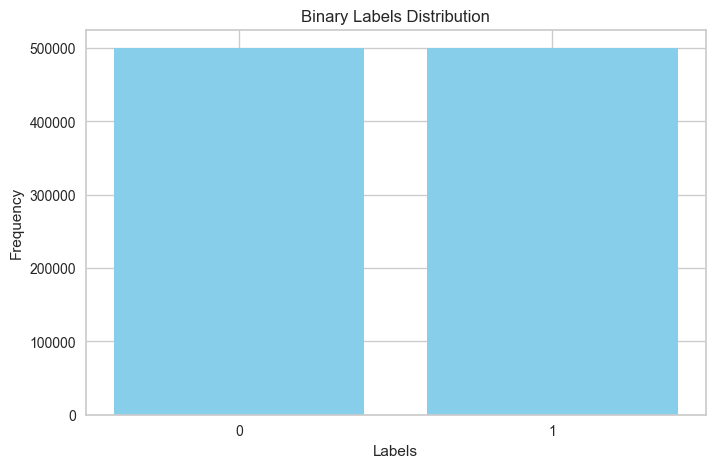

In [11]:
# Get unique values and counts for binary labels
binary_unique, binary_counts = np.unique(labels_binary, return_counts=True)
# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(binary_unique, binary_counts, color='skyblue')
plt.title("Binary Labels Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(binary_unique)
plt.savefig("plots/binarylabel.png")
plt.show()

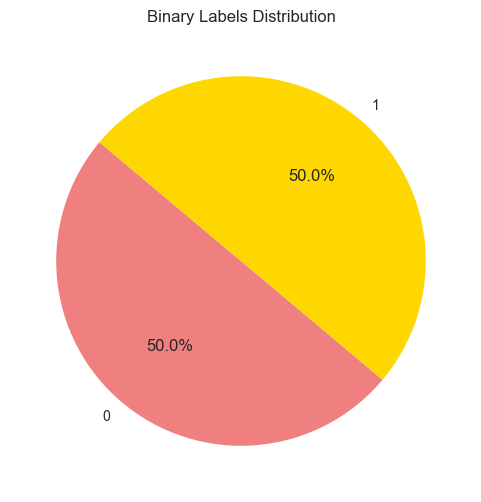

In [12]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(binary_counts, labels=binary_unique, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold'])
plt.title("Binary Labels Distribution")
plt.savefig("plots/piebinary.png")
plt.show()

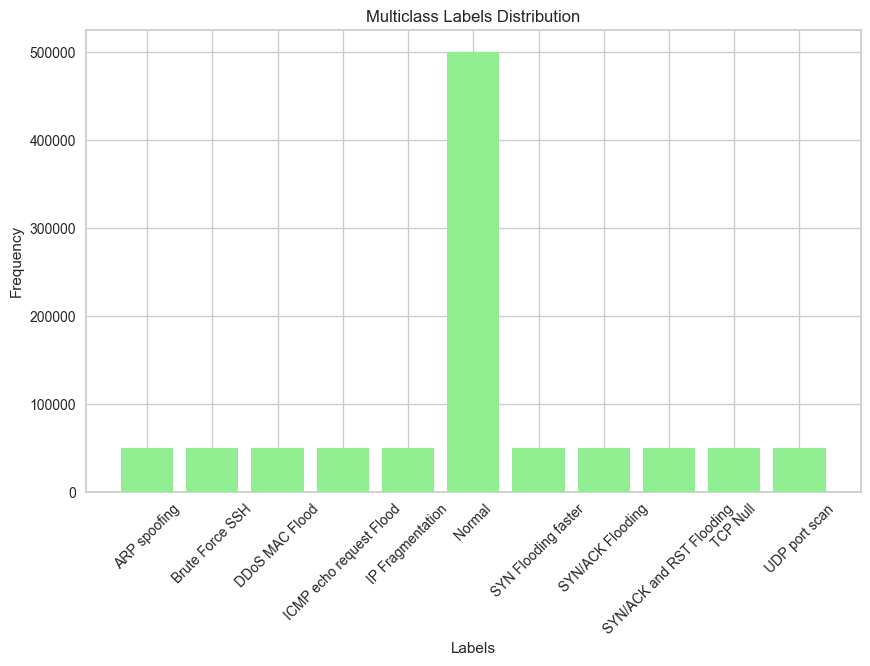

In [13]:
# Visualization for Multiclass Labels
multiclass_unique, multiclass_counts = np.unique(labels_multiclass, return_counts=True)

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(multiclass_unique, multiclass_counts, color='lightgreen')
plt.title("Multiclass Labels Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.savefig("plots/barmulti.png")
plt.xticks(rotation=45)
plt.show()

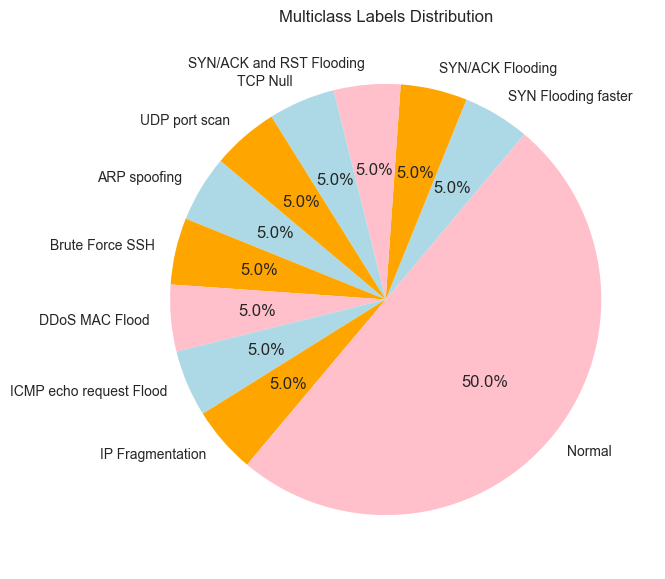

In [14]:
# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(multiclass_counts, labels=multiclass_unique, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'pink'])
plt.title("Multiclass Labels Distribution")
plt.savefig("plots/piemulti.png")
plt.show()


##  Normalize or Scale the Features


In [15]:

# Initialize a scaler
scaler = StandardScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame for compatibility
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

features_scaled.head(2)

,delta_time,frame_len,udp_len,ip_ttl,icmp_type,tos,ip_flags_rb,ip_flags_df,ip_flags_mf,tcp_flags_res,tcp_flags_ns,tcp_flags_cwr,tcp_flags_ecn,tcp_flags_urg,tcp_flags_ack,tcp_flags_push,tcp_flags_reset,tcp_flags_syn,tcp_flags_fin
0,-0.013344,0.168117,1.979270,0.045779,-0.28207,-0.245309,0.262375,-0.534490,0.167893,-1.332428,-1.332428,-1.332428,-1.332428,-1.332428,-1.222336,-1.148098,-1.25841,-1.160585,-1.318157
1,-0.013338,-0.508482,-0.358878,-2.557236,-0.28207,-0.341007,-3.811333,-2.239396,-3.383218,-1.332428,-1.332428,-1.332428,-1.332428,-1.332428,-1.222336,-1.148098,-1.25841,-1.160585,-1.318157


# Split Data into Train and Test Sets

In [16]:

# Split the data
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    features_scaled, labels_binary, test_size=0.2, random_state=42, stratify=labels_binary
)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    features_scaled, labels_multiclass, test_size=0.2, random_state=42, stratify=labels_multiclass
)

# Display the shapes of the train and test sets
print("Train/Test Shapes for Binary Classification:")
print("X_train:", X_train.shape, "y_train_binary:", y_train_binary.shape)
print("X_test:", X_test.shape, "y_test_binary:", y_test_binary.shape)

print("Train/Test Shapes for Multiclass Classification:")
print("X_train:", X_train_multi.shape, "y_train_multi:", y_train_multi.shape)
print("X_test:", X_test_multi.shape, "y_test_multi:", y_test_multi.shape)


Train/Test Shapes for Binary Classification:
X_train: (800000, 19) y_train_binary: (800000,)
X_test: (200000, 19) y_test_binary: (200000,)
Train/Test Shapes for Multiclass Classification:
X_train: (800000, 19) y_train_multi: (800000,)
X_test: (200000, 19) y_test_multi: (200000,)


# working with binary data

# Model Training and Execution

In [20]:
# Initialize a dictionary to store results dynamically
results = {}

# Updated function to train, evaluate, and collect metrics
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n### Training {model_name} ###")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Dynamically store metrics for the model
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    
    # Print metrics
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    # Confusion Matrix Visualization
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f'plots/binary/{model_name}_confusion_matrix.png')  # Save confusion matrix plot
    plt.show()


# DecisionTreeClassifier


### Training DecisionTree ###
Accuracy for DecisionTree: 0.94999
Confusion Matrix for DecisionTree:
[[98941  1059]
 [ 8943 91057]]
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    100000
           1       0.99      0.91      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



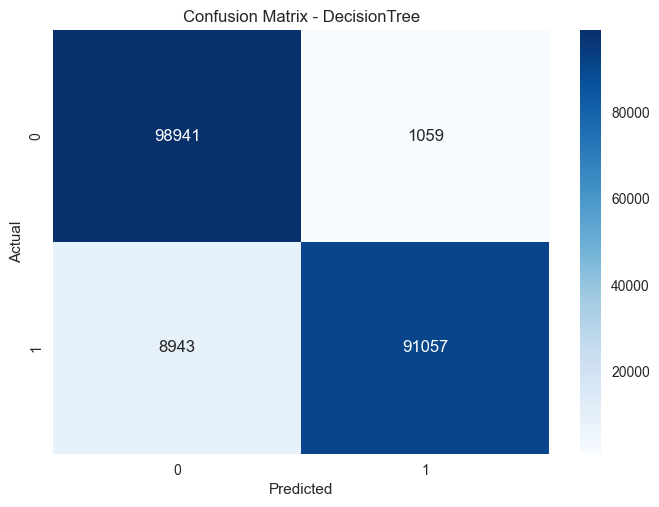

In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=32)
train_and_evaluate_model(model, "DecisionTree", X_train, y_train_binary, X_test, y_test_binary)


# ExtraTrees


### Training ExtraTrees ###
Accuracy for ExtraTrees: 0.94722
Confusion Matrix for ExtraTrees:
[[98372  1628]
 [ 8928 91072]]
Classification Report for ExtraTrees:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    100000
           1       0.98      0.91      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



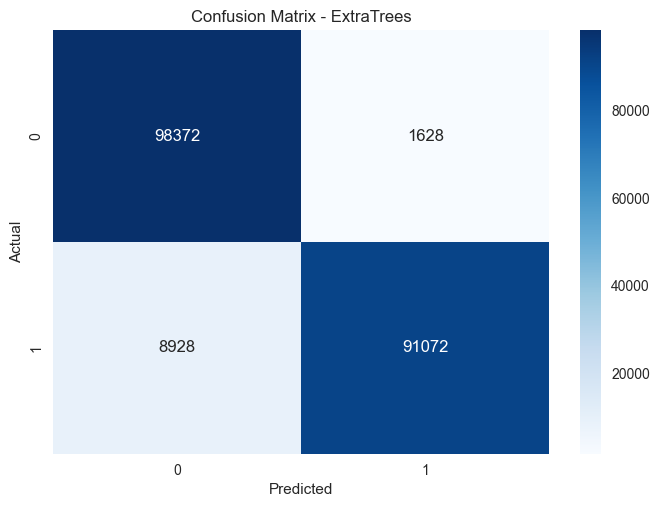

In [22]:
model = ExtraTreesClassifier(criterion='entropy', max_depth=50, n_jobs=-1, random_state=32)
train_and_evaluate_model(model, "ExtraTrees", X_train, y_train_binary, X_test, y_test_binary)


# RandomForest



### Training RandomForest ###
Accuracy for RandomForest: 0.95011
Confusion Matrix for RandomForest:
[[98967  1033]
 [ 8945 91055]]
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    100000
           1       0.99      0.91      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



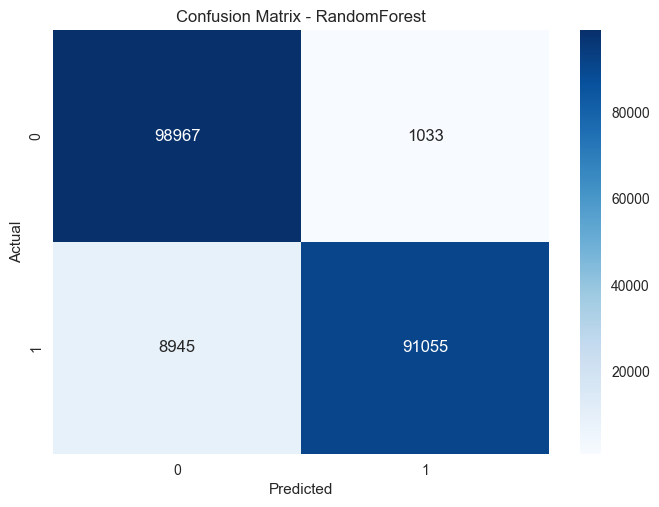

In [23]:
model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150, n_jobs=-1, random_state=32)
train_and_evaluate_model(model, "RandomForest", X_train, y_train_binary, X_test, y_test_binary)


# GradientBoosting


### Training GradientBoosting ###
Accuracy for GradientBoosting: 0.95035
Confusion Matrix for GradientBoosting:
[[99060   940]
 [ 8990 91010]]
Classification Report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    100000
           1       0.99      0.91      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



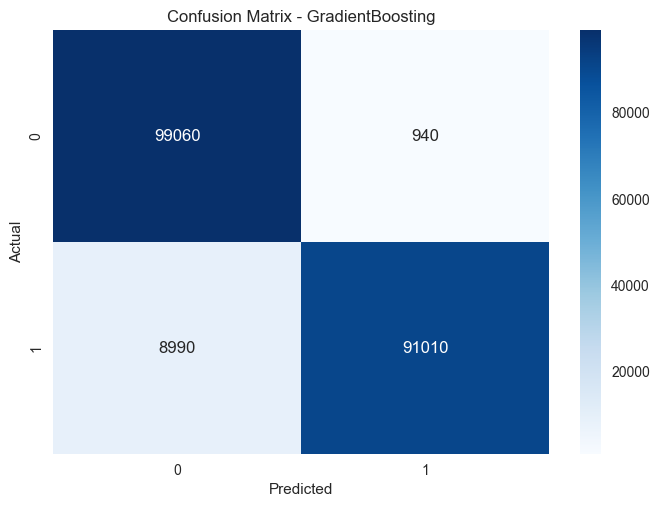

In [24]:
model = GradientBoostingClassifier(max_depth=9, random_state=64)
train_and_evaluate_model(model, "GradientBoosting", X_train, y_train_binary, X_test, y_test_binary)


# GaussianNB


### Training GaussianNB ###
Accuracy for GaussianNB: 0.753595
Confusion Matrix for GaussianNB:
[[98935  1065]
 [48216 51784]]
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80    100000
           1       0.98      0.52      0.68    100000

    accuracy                           0.75    200000
   macro avg       0.83      0.75      0.74    200000
weighted avg       0.83      0.75      0.74    200000



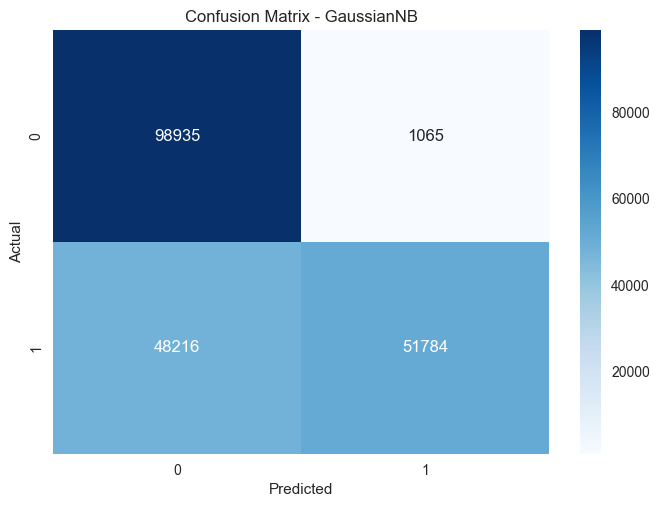

In [25]:

model = GaussianNB()
train_and_evaluate_model(model, "GaussianNB", X_train, y_train_binary, X_test, y_test_binary)


# LinearDiscriminantAnalysis


### Training LinearDiscriminantAnalysis ###
Accuracy for LinearDiscriminantAnalysis: 0.9102
Confusion Matrix for LinearDiscriminantAnalysis:
[[98354  1646]
 [16314 83686]]
Classification Report for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    100000
           1       0.98      0.84      0.90    100000

    accuracy                           0.91    200000
   macro avg       0.92      0.91      0.91    200000
weighted avg       0.92      0.91      0.91    200000



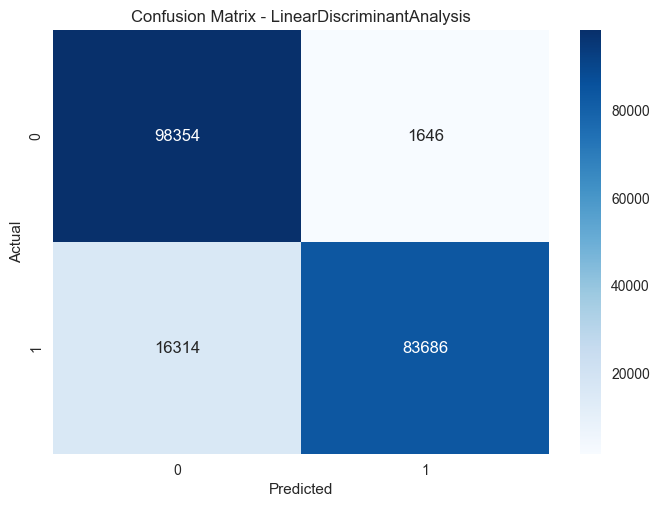

In [26]:
# LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
train_and_evaluate_model(model, "LinearDiscriminantAnalysis", X_train, y_train_binary, X_test, y_test_binary)


# KNN (K-Nearest Neighbors)



### Training KNN ###
Accuracy for KNN: 0.94079
Confusion Matrix for KNN:
[[95663  4337]
 [ 7505 92495]]
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    100000
           1       0.96      0.92      0.94    100000

    accuracy                           0.94    200000
   macro avg       0.94      0.94      0.94    200000
weighted avg       0.94      0.94      0.94    200000



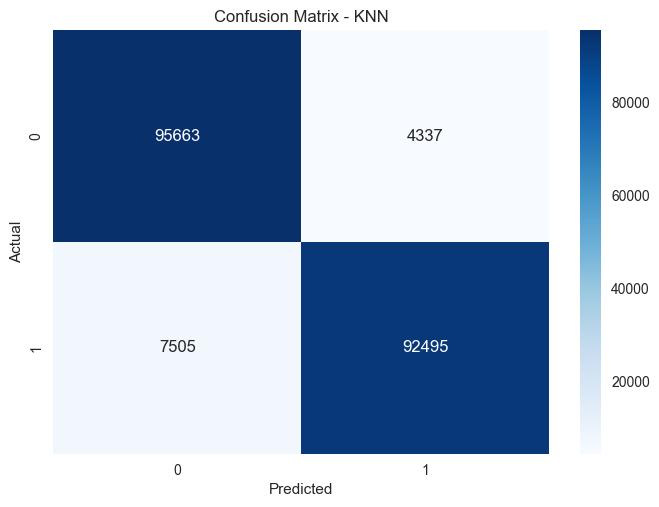

In [27]:

model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
train_and_evaluate_model(model, "KNN", X_train, y_train_binary, X_test, y_test_binary)


## XGBoost


### Training XGBoost ###
Accuracy for XGBoost: 0.94965
Confusion Matrix for XGBoost:
[[99044   956]
 [ 9114 90886]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    100000
           1       0.99      0.91      0.95    100000

    accuracy                           0.95    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.95      0.95      0.95    200000



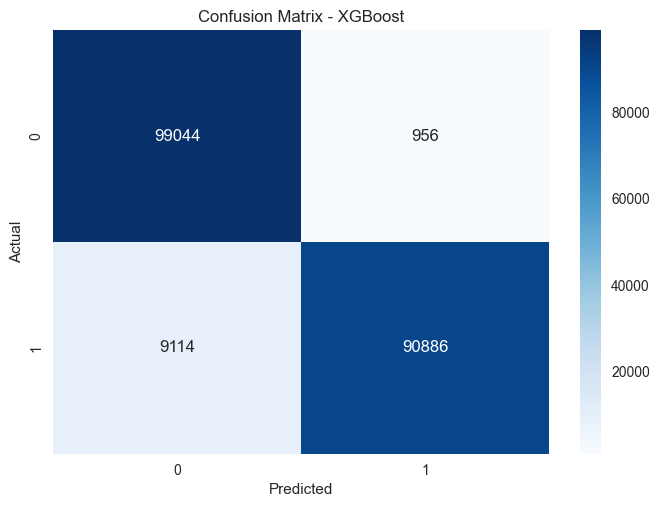

In [28]:
# XGBoost
model = XGBClassifier(eval_metric='mlogloss', n_jobs=-1, random_state=32)
train_and_evaluate_model(model, "XGBoost", X_train, y_train_binary, X_test, y_test_binary)


## comparing 

In [29]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
print("### Model Performance Summary ###")
print(results_df)

# Save results to CSV (optional)
results_df.to_csv('model_comparison_results.csv', index=False)


### Model Performance Summary ###
                        Model  Accuracy  Precision    Recall  F1-Score
0                DecisionTree  0.949990   0.952805  0.949990  0.949912
1                  ExtraTrees  0.947220   0.949616  0.947220  0.947150
2                RandomForest  0.950110   0.952945  0.950110  0.950032
3            GradientBoosting  0.950350   0.953287  0.950350  0.950269
4                  GaussianNB  0.753595   0.826092  0.753595  0.739094
5  LinearDiscriminantAnalysis  0.910200   0.919220  0.910200  0.909714
6                         KNN  0.940790   0.941233  0.940790  0.940775
7                     XGBoost  0.949650   0.952663  0.949650  0.949566


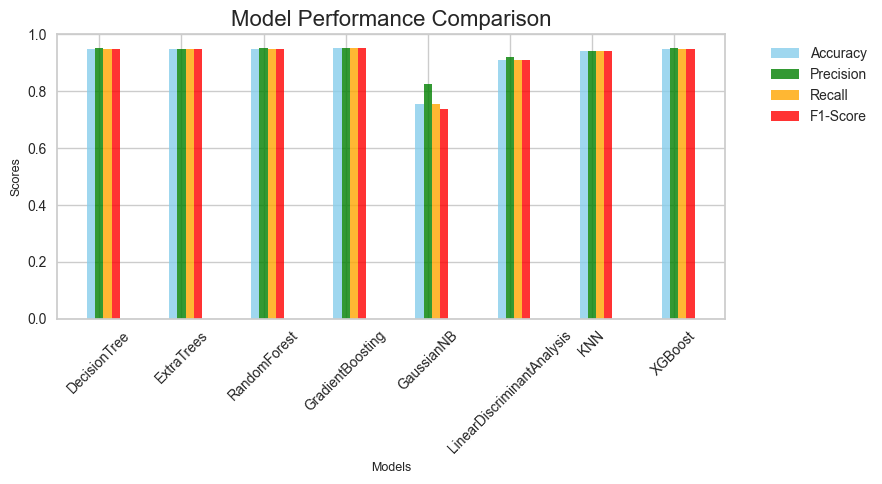

In [30]:
# Convert results to a sorted list of models and metrics
models = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in models]
precisions = [results[model]["Precision"] for model in models]
recalls = [results[model]["Recall"] for model in models]
f1_scores = [results[model]["F1-Score"] for model in models]

# Combined Metrics Comparison
x = np.arange(len(models))  # Model indices
width = 0.1  # Bar width

plt.figure(figsize=(9, 5))
plt.bar(x - width, accuracies, width, label='Accuracy', color='skyblue', alpha=0.8)
plt.bar(x, precisions, width, label='Precision', color='green', alpha=0.8)
plt.bar(x + width, recalls, width, label='Recall', color='orange', alpha=0.8)
plt.bar(x + 2*width, f1_scores, width, label='F1-Score', color='red', alpha=0.8)

plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Models", fontsize=9)
plt.ylabel("Scores", fontsize=9)
plt.xticks(x, models, rotation=45, fontsize=10)
plt.ylim(0, 1)  # All metrics range from 0 to 1
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("plots/binary_comparison.png")
plt.show()


#  Multiclass Labels

In [31]:
from sklearn.model_selection import train_test_split

# Train-test split for multiclass labels
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    features_scaled, labels_multiclass, test_size=0.2, random_state=42, stratify=labels_multiclass
)

print("Training Data Shape:", X_train_mc.shape)
print("Testing Data Shape:", X_test_mc.shape)
print("Unique Classes in Multiclass Labels:", np.unique(y_train_mc))


Training Data Shape: (800000, 19)
Testing Data Shape: (200000, 19)
Unique Classes in Multiclass Labels: ['ARP spoofing' 'Brute Force SSH' 'DDoS MAC Flood'
 'ICMP echo request Flood' 'IP Fragmentation' 'Normal'
 'SYN Flooding faster' 'SYN/ACK Flooding' 'SYN/ACK and RST Flooding'
 'TCP Null' 'UDP port scan']


In [32]:
# Initialize a dictionary to store results dynamically
results = {}

def train_and_evaluate_model_multiclass(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n### Training {model_name} ###")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Dynamically store metrics for the model
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
    
    # Print metrics
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    # Confusion Matrix Visualization
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f'plots/multimodel/{model_name}_confusion_matrix.png')  # Save confusion matrix plot
    plt.show()

In [33]:
# Train Multiclass Models

# Decision Trees


### Training DecisionTree ###
Accuracy for DecisionTree: 0.92446
Confusion Matrix for DecisionTree:
[[ 4062     6     0     0     0  5932     0     0     0     0     0]
 [    4  7125     0     0     0  2871     0     0     0     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    0     0     0     0  9997     3     0     0     0     0     0]
 [ 1135   372     0     0     0 98491     0     0     0     0     2]
 [    0     0     0     0     0     0  9592   169   239     0     0]
 [    0     0     0     0     0     0   538  8479   983     0     0]
 [    0     0     0     0     0     0  1536  1318  7146     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     0     0     0     0     0 10000]]
Classification Report for DecisionTree:
                          precision    recall  f1-score   support

            ARP spoofing       0

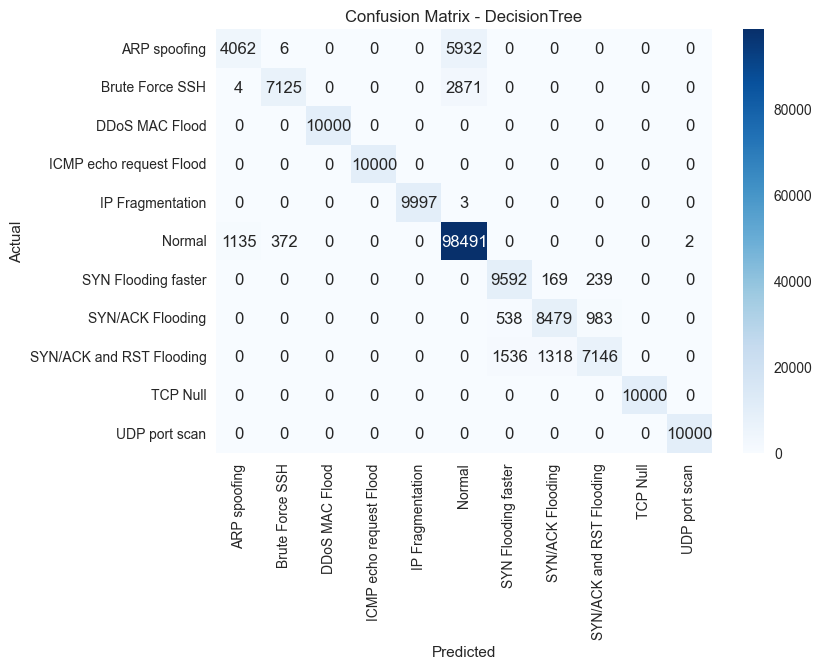

In [34]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=32)
train_and_evaluate_model_multiclass(model, "DecisionTree", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# Extra Trees



### Training ExtraTrees ###
Accuracy for ExtraTrees: 0.921595
Confusion Matrix for ExtraTrees:
[[ 4262     8     0     0     0  5730     0     0     0     0     0]
 [    7  7064     0     0     0  2929     0     0     0     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    0     0     0     0  9997     3     0     0     0     0     0]
 [ 1734   487     0     0     0 97777     0     0     0     0     2]
 [    0     0     0     0     0     0  9590   169   241     0     0]
 [    0     0     0     0     0     0   537  8480   983     0     0]
 [    0     0     0     0     0     0  1532  1318  7150     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     1     0     0     0     0  9999]]
Classification Report for ExtraTrees:
                          precision    recall  f1-score   support

            ARP spoofing       0.71    

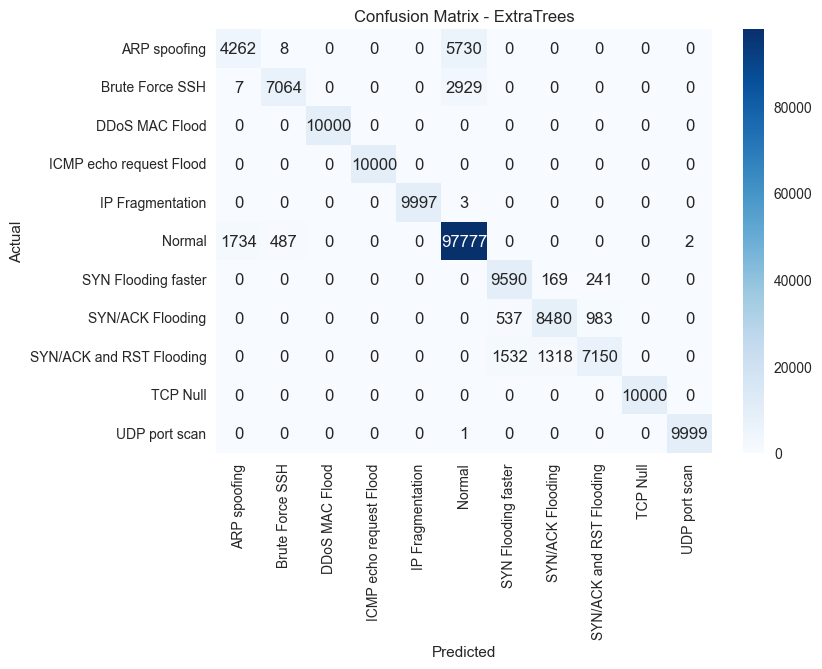

In [35]:
model = ExtraTreesClassifier(criterion='entropy', max_depth=50, n_jobs=-1, random_state=32)
train_and_evaluate_model_multiclass(model, "ExtraTrees", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# Random Forest



### Training RandomForest ###
Accuracy for RandomForest: 0.92523
Confusion Matrix for RandomForest:
[[ 3985     3     0     0     0  6012     0     0     0     0     0]
 [    1  7130     0     0     0  2869     0     0     0     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    0     0     0     0  9997     3     0     0     0     0     0]
 [  929   346     0     0     0 98723     0     0     0     0     2]
 [    0     0     0     0     0     0  9569   168   263     0     0]
 [    0     0     0     0     0     0   534  8415  1051     0     0]
 [    0     0     0     0     0     0  1507  1266  7227     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     0     0     0     0     0 10000]]
Classification Report for RandomForest:
                          precision    recall  f1-score   support

            ARP spoofing       0

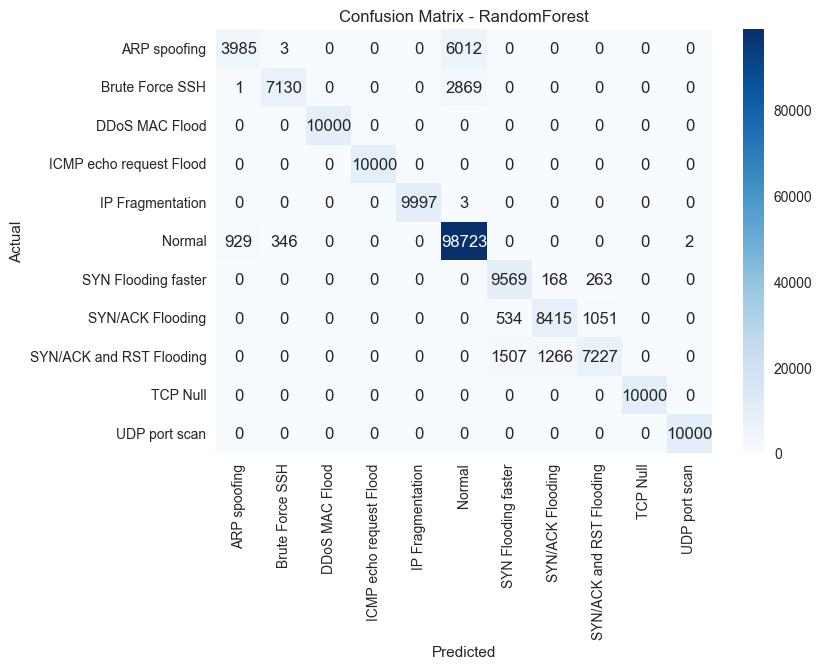

In [36]:
model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=150, n_jobs=-1, random_state=32)
train_and_evaluate_model_multiclass(model, "RandomForest", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# GaussianNB


### Training GaussianNB ###
Accuracy for GaussianNB: 0.70565
Confusion Matrix for GaussianNB:
[[ 9025    64     0     0   301   610     0     0     0     0     0]
 [    0  9998     0     0     0     0     0     0     2     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    4     0     0     5  6987    20     0     0  2984     0     0]
 [31775 11382     0     1     0 56837     0     0     0     0     5]
 [    0     0     0     0     2     0  9997     0     1     0     0]
 [    0     0     0     0     0     0  5036  4960     4     0     0]
 [    1     0     0     0     2     0  3348  3323  3326     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     0     0     0     0     0 10000]]
Classification Report for GaussianNB:
                          precision    recall  f1-score   support

            ARP spoofing       0.22     

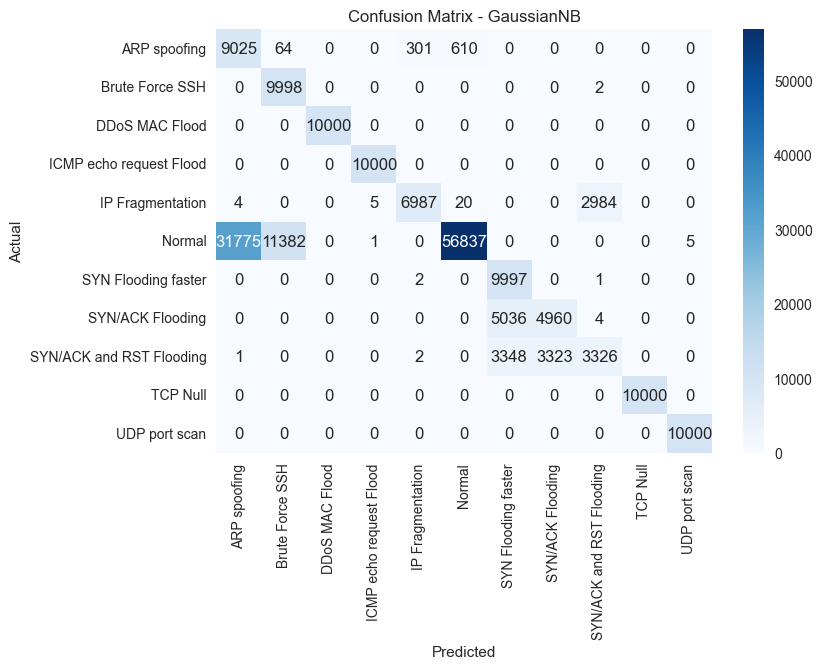

In [37]:
model = GaussianNB()
train_and_evaluate_model_multiclass(model, "GaussianNB", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# LinearDiscriminant


### Training LinearDiscriminantAnalysis ###
Accuracy for LinearDiscriminantAnalysis: 0.759035
Confusion Matrix for LinearDiscriminantAnalysis:
[[ 6998     0  1674     0     0  1328     0     0     0     0     0]
 [    0  1566     0     0     0  7582     0   436   416     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0  4855  5145     0     0     0     0     0     0     0]
 [    0     0    11     0  6593     3     0     0     0  3393     0]
 [14970   360   912   396     0 83217     0    65    64    11     5]
 [    0     0     0     0     0     0 10000     0     0     0     0]
 [    0     0     0     0     0     0  5040  4960     0     0     0]
 [    0     0     0     0     0     0  3349  3323  3328     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     0     0     0     0     0 10000]]
Classification Report for LinearDiscriminantAnalysis:
                          precision    rec

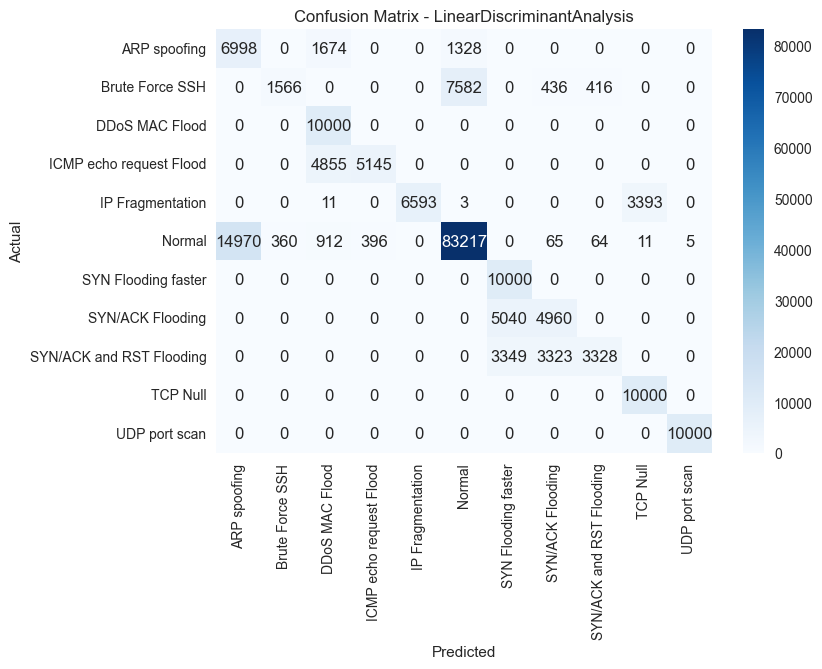

In [38]:
model = LinearDiscriminantAnalysis()
train_and_evaluate_model_multiclass(model, "LinearDiscriminantAnalysis", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# KNN


### Training KNN ###
Accuracy for KNN: 0.9142
Confusion Matrix for KNN:
[[ 4736    18     0     0     0  5246     0     0     0     0     0]
 [   24  7591     0     0     0  2385     0     0     0     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    0     0     0     0  9997     3     0     0     0     0     0]
 [ 2776  1366     0     0     0 95858     0     0     0     0     0]
 [    0     0     0     0     0     0  9113   274   613     0     0]
 [    0     0     0     0     0     0   470  8769   761     0     0]
 [    0     0     0     0     0     0  1368  1854  6778     0     0]
 [    0     0     0     0     0     0     0     0     0 10000     0]
 [    0     0     0     0     0     2     0     0     0     0  9998]]
Classification Report for KNN:
                          precision    recall  f1-score   support

            ARP spoofing       0.63      0.47      0.54     10000
   

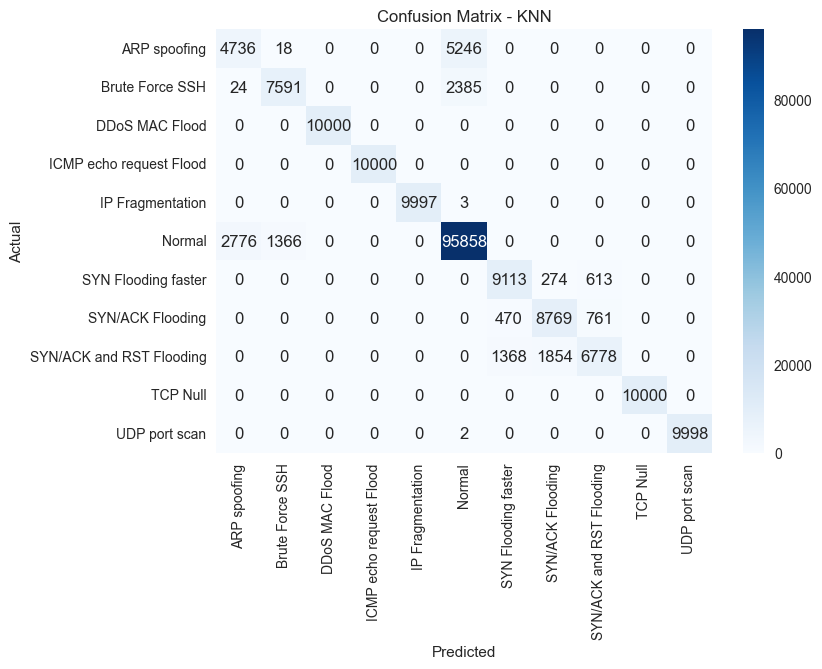

In [39]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
train_and_evaluate_model_multiclass(model, "KNN", X_train_mc, y_train_mc, X_test_mc, y_test_mc)


# XGBoost

Class Mapping: {'ARP spoofing': np.int64(0), 'Brute Force SSH': np.int64(1), 'DDoS MAC Flood': np.int64(2), 'ICMP echo request Flood': np.int64(3), 'IP Fragmentation': np.int64(4), 'Normal': np.int64(5), 'SYN Flooding faster': np.int64(6), 'SYN/ACK Flooding': np.int64(7), 'SYN/ACK and RST Flooding': np.int64(8), 'TCP Null': np.int64(9), 'UDP port scan': np.int64(10)}

### Training XGBoost ###
Accuracy for XGBoost: 0.924925
Confusion Matrix for XGBoost:
[[ 3692     3     0     0     0  6305     0     0     0     0     0]
 [    0  7081     0     0     0  2919     0     0     0     0     0]
 [    0     0 10000     0     0     0     0     0     0     0     0]
 [    0     0     0 10000     0     0     0     0     0     0     0]
 [    0     0     0     0  9997     3     0     0     0     0     0]
 [  577   412     0     0     0 99010     0     0     0     0     1]
 [    0     0     0     0     0     0  9570   164   266     0     0]
 [    0     0     0     0     0     0   534  8380  1086     

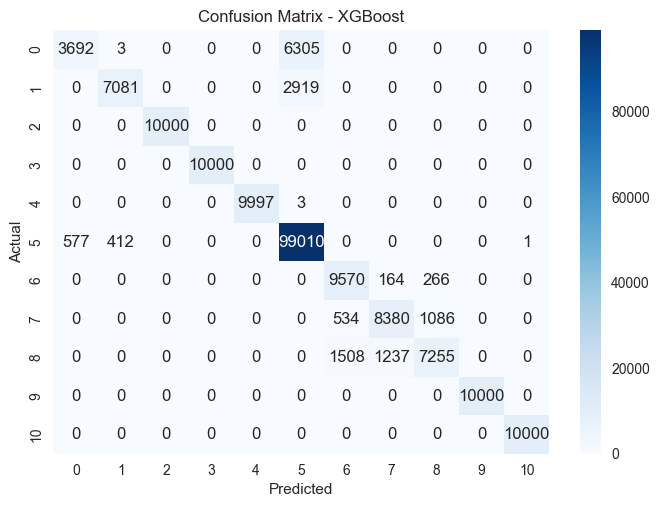

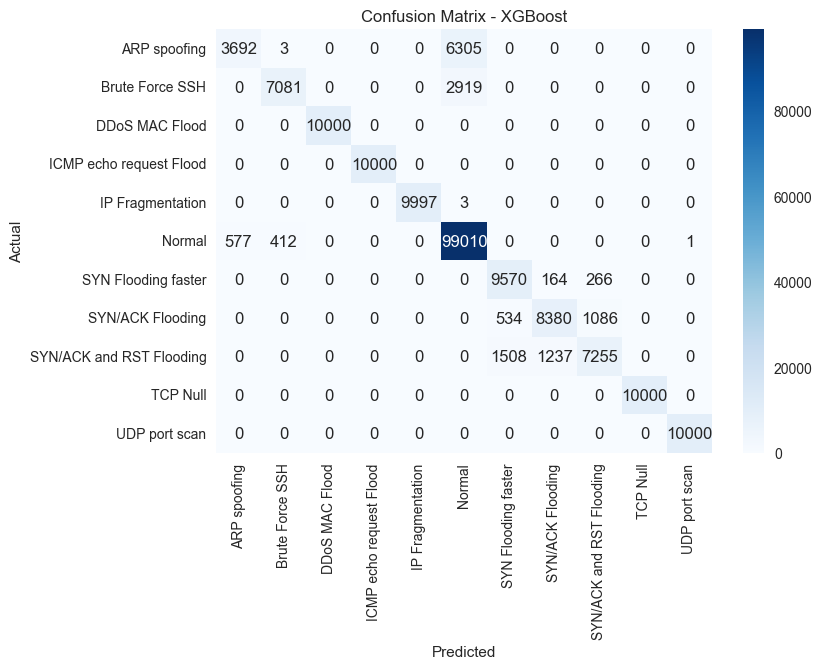

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode the multiclass labels
label_encoder = LabelEncoder()
y_train_mc_encoded = label_encoder.fit_transform(y_train_mc)
y_test_mc_encoded = label_encoder.transform(y_test_mc)

# Check the mapping of classes
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
# Train and evaluate XGBoost with encoded labels
model = XGBClassifier(eval_metric='mlogloss', n_jobs=-1, random_state=32)
train_and_evaluate_model_multiclass(model, "XGBoost", X_train_mc, y_train_mc_encoded, X_test_mc, y_test_mc_encoded)
# Decode predictions back to original labels
y_pred_encoded = model.predict(X_test_mc)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Decode true labels (optional, for clarity)
y_test = label_encoder.inverse_transform(y_test_mc_encoded)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Model Performance Metrics:

                            Accuracy  Precision    Recall  F1-Score
DecisionTree                0.924460   0.921834  0.924460  0.918181
ExtraTrees                  0.921595   0.917879  0.921595  0.916143
RandomForest                0.925230   0.923154  0.925230  0.918680
GaussianNB                  0.705650   0.860203  0.705650  0.733621
LinearDiscriminantAnalysis  0.759035   0.819685  0.759035  0.755865
KNN                         0.914200   0.910238  0.914200  0.910861
XGBoost                     0.924925   0.924036  0.924925  0.917440


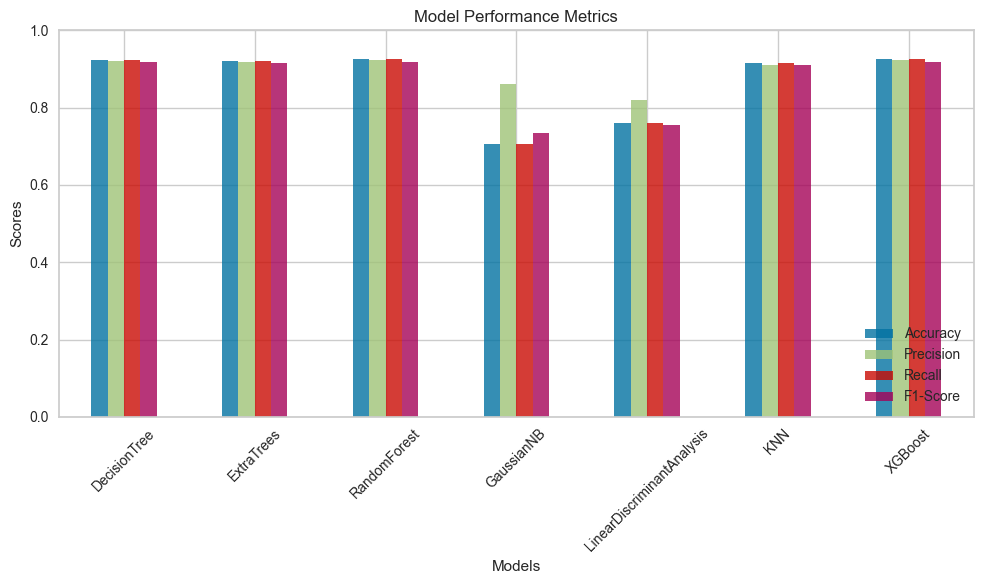

In [41]:
# Convert results into a DataFrame for easy visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Metrics:\n")
print(results_df)
results_df.to_csv('multi_model_comparison_results.csv', index=False)


# Bar Plot for Model Comparison
results_df.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title("Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(f'plots/multi_model_comparision.png')  # Save confusion matrix plot
plt.show()